In [10]:
import pandas as pd
import numpy as np

# Parameters
num_floors = 3
num_aps_per_floor = 2
points_per_floor = 50
x_range = (0, 100)
y_range = (0, 100)
signal_strength_range = (-80, -40)

# Generate example data
data = []

for floor in range(1, num_floors + 1):
    for ap in range(1, num_aps_per_floor + 1):
        ap_id = f'AP_Floor{floor}_AP{ap}'
        for _ in range(points_per_floor):
            x = np.random.uniform(*x_range)
            y = np.random.uniform(*y_range)
            signal_strength = np.random.uniform(*signal_strength_range)
            data.append([floor, ap_id, x, y, signal_strength])

# Create a DataFrame
df = pd.DataFrame(data, columns=['floor', 'ap_id', 'x', 'y', 'signal_strength'])

# Save to CSV
df.to_csv('wifi_data.csv', index=False)

print("Example data generated and saved to 'wifi_data.csv'.")


Example data generated and saved to 'wifi_data.csv'.


In [1]:

import seaborn

In [2]:
from scipy.interpolate import griddata

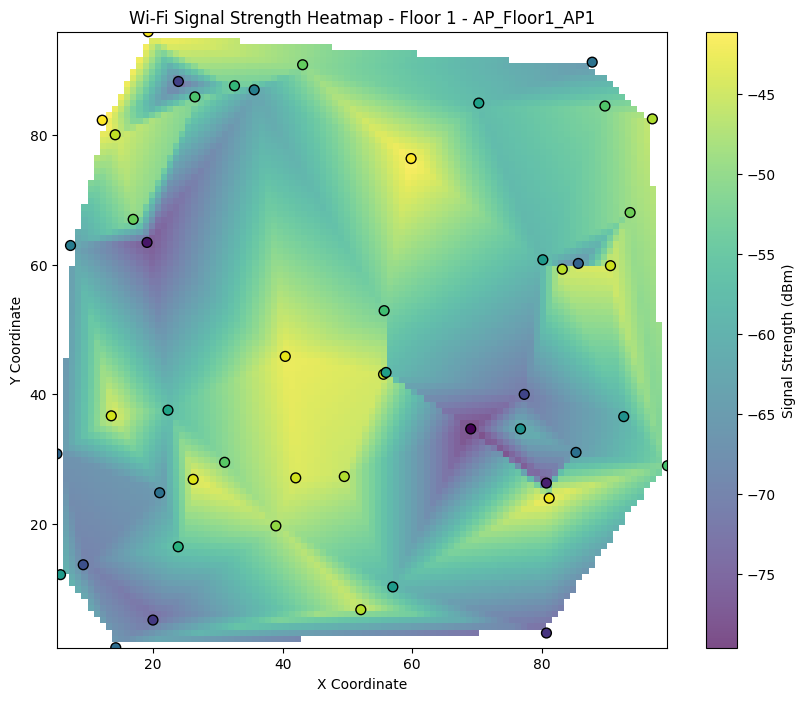

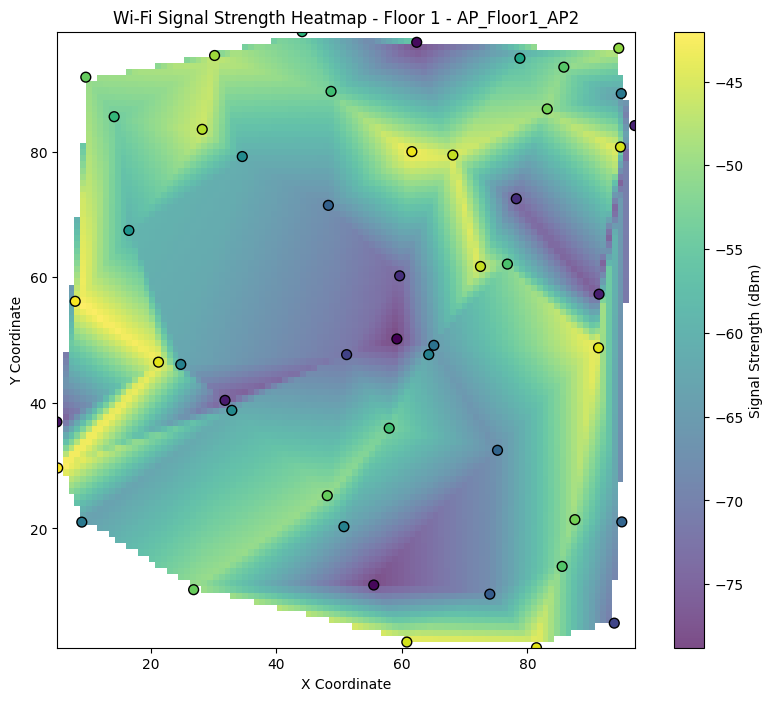

ValueError: No points given

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.interpolate import griddata

def create_heatmaps(data_file, floor_plan_image=None):
    # Load the data
    data = pd.read_csv(data_file)

    # Get the unique floors and APs
    floors = data['floor'].unique()
    aps = data['ap_id'].unique()

    for floor in floors:
        for ap in aps:
            # Filter data for the current floor and AP
            floor_data = data[(data['floor'] == floor) & (data['ap_id'] == ap)]
            x = floor_data['x']
            y = floor_data['y']
            signal_strength = floor_data['signal_strength']

            # Create a grid to interpolate the data
            xi = np.linspace(x.min(), x.max(), 100)
            yi = np.linspace(y.min(), y.max(), 100)
            xi, yi = np.meshgrid(xi, yi)

            # Interpolate signal strength data
            zi = griddata((x, y), signal_strength, (xi, yi), method='linear')

            # Plot the heatmap
            plt.figure(figsize=(10, 8))

            if floor_plan_image:
                # Load and display the floor plan image if provided
                img = plt.imread(floor_plan_image)
                plt.imshow(img, extent=[x.min(), x.max(), y.min(), y.max()], aspect='auto', alpha=0.5)

            # Create the heatmap
            heatmap = plt.imshow(zi, origin='lower', extent=[x.min(), x.max(), y.min(), y.max()],
                                 cmap='viridis', alpha=0.7)

            # Add a color bar
            cbar = plt.colorbar(heatmap)
            cbar.set_label('Signal Strength (dBm)')

            # Plot data points on the heatmap
            plt.scatter(x, y, c=signal_strength, cmap='viridis', edgecolor='k', s=50)

            # Add titles and labels
            plt.title(f'Wi-Fi Signal Strength Heatmap - Floor {floor} - {ap}')
            plt.xlabel('X Coordinate')
            plt.ylabel('Y Coordinate')

            # Show the heatmap
            plt.show()

# Example usage
create_heatmaps('wifi_data.csv', floor_plan_image=None)
